In [1]:
import wget
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [2]:
class Node:
    DELTA = 1
    NODE_WIDTH = 1
    
    def __init__(self, data):
        self.data = data
        self.children = []
        self.x = None
        self.y = None
    
    def add_child(self, node):
        self.children.append(node)
        
    def set_pos(self, x, y):
        self.x = x
        self.y = y
        
    def draw(self):
        x, y = self.x, self.y
        w = Node.NODE_WIDTH*2
        
        xl, xr = x - w/2, x + w/2
        yu, yd = y, y - w
        
        l = [[xl, xl], [yd, yu]]
        r = [[xr, xr], [yd, yu]]
        u = [[xl, xr], [yu, yu]]
        d = [[xl, xr], [yd, yd]]
        
        plt.plot(*l,*r,*u,*d, color='blue')
        

In [3]:
class Tree:
    def __init__(self, root_node):
        self.root = root_node
        self.calc_width()
        self.calc_pos()
        
    def calc_width(self):
        return self._calc_width(self.root)
        
    def _calc_width(self, node):
        width = -Node.DELTA
        for c in node.children:
            width += Node.DELTA
            width += self._calc_width(c)
        
        node.width = max(Node.NODE_WIDTH, width)
        return node.width
        
    def calc_pos(self):
        self.root.set_pos(0,0)
        self._calc_pos(self.root, 0)
        
    def _calc_pos(self, node, y):
        chn = node.children
        n = len(chn)
        y = y - 2
               
        cur_node_width = 1
        x = node.x - (node.width/2) - (cur_node_width/2) - Node.DELTA
        for i in range(n):
            x += (cur_node_width/2)
            x += Node.DELTA
            x += (chn[i].width/2)
            chn[i].set_pos(x,y)
            
            self._calc_pos(chn[i], y)
            
            cur_node_width = chn[i].width
    
    def draw(self):
        self._draw(self.root)
    
    def _draw(self, node):
        node.draw()
        for c in node.children:
            self.draw_line(node, c)
            self._draw(c)
            
    def draw_line(self, nf, nt):
        x, y = [nf.x, nt.x], [nf.y - Node.NODE_WIDTH, nt.y]
        plt.plot(x,y, color='black')

In [4]:
def make_tree_from_xml(xmlnode, node):
    for xmlchild in xmlnode:
        child = Node(xmlchild.tag)
        node.add_child(child)
        make_tree_from_xml(xmlchild, child)

In [5]:
filename = wget.download('https://www.cs.umd.edu/hcil/iv03contest/datasets/phylo_B_IM__03-02-01.xml')
xmlroot = ET.parse(filename).getroot()
root = Node(xmlroot.tag)
make_tree_from_xml(xmlroot, root)
tree = Tree(root)

100% [..........................................................] 15123 / 15123

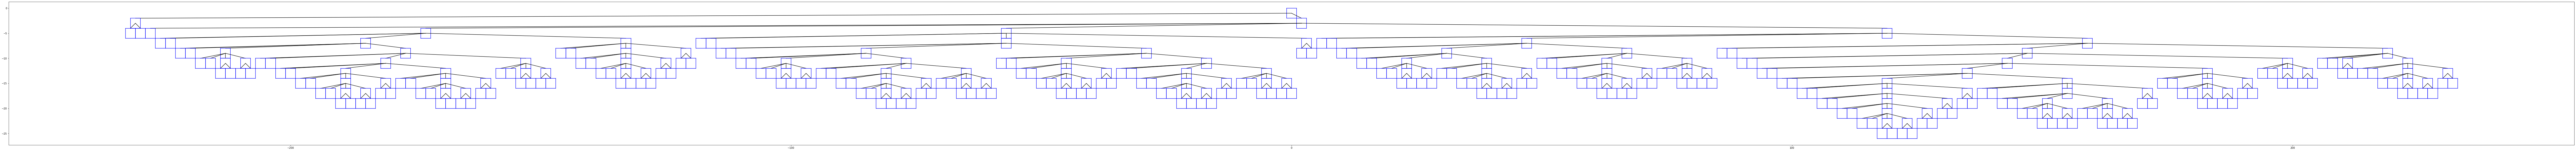

In [6]:
plt.gca().set_aspect('equal', adjustable='box')
tree.draw()
fig = plt.gcf()
fig.set_size_inches(185, 105)

plt.savefig('result.png', dpi=150)